In [1]:
import os
import pandas as pd
import numpy as np
import random
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [39]:
import numpy as np

def planar_staircase_mechanism(epsilon, delta, n, num_samples):
    # Calculate the probabilities for each interval using the geometric decay
    probabilities = np.array([(1 - np.exp(-epsilon)) * np.exp(-i * epsilon) for i in range(n)])
    probabilities /= np.sum(probabilities)  # Normalize to sum to 1
    
    # Determine the ranges of r
    ranges = np.array([i * delta for i in range(n+1)])
    
    # Sample from the discrete distribution
    indices = np.random.choice(n, size=num_samples, p=probabilities)
    
    # For each chosen index, sample uniformly within the corresponding interval
    samples = np.random.uniform(low=ranges[indices], high=ranges[indices + 1])
    
    return samples

# Example usage
epsilon = 0.1
delta = 1
n = 100000  # Number of intervals
num_samples = 100000

samples = planar_staircase_mechanism(epsilon, delta, n, num_samples)
print(samples)


[0.4066128  5.6861103  0.14993314 ... 7.08253355 2.94710212 4.58450595]


In [40]:
samples.mean()

9.97991411569464

In [41]:
samples.max()

146.26923850209565

In [42]:
samples.max()

146.26923850209565

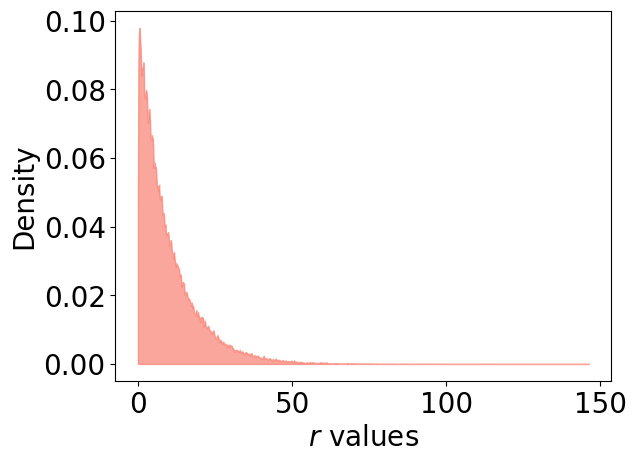

In [43]:
rl_array = np.array(samples).reshape(-1, 1)  # Reshape to 2D array for sklearn

# Fit Kernel Density Estimation
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
kde.fit(rl_array)

# If you want to evaluate the density at specific points:
x_l = np.linspace(0, max(samples), 1000).reshape(-1, 1)
log_density = kde.score_samples(x_l)
pdf = np.exp(log_density)  # Convert log density to probability density


plt.fill_between(x_l.flatten(), pdf, color='salmon', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=20)
# Adjusting the x-axis and y-axis tick intervals and formatting
plt.xticks(np.arange(0, 155, 50))  # Set x ticks from 0 to 12 with a step of 1
plt.xlabel('$r$ values', size = 20 )
plt.ylabel('Density', size = 20)
plt.show()

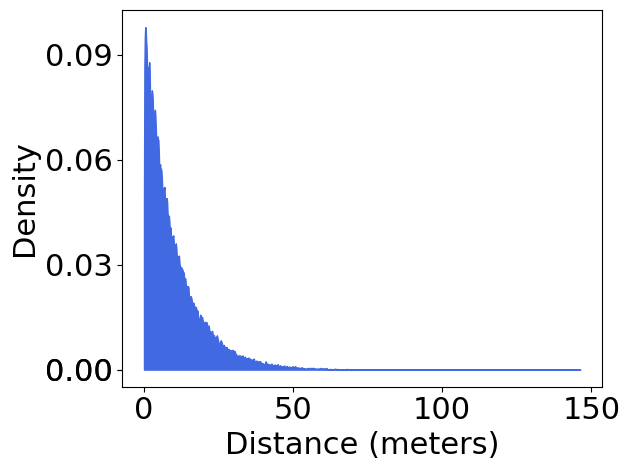

In [44]:
plt.fill_between(x_l.flatten(), pdf, color='royalblue', alpha=1)
plt.tick_params(axis='both', which='major', labelsize=22)
# Adjusting the x-axis and y-axis tick intervals and formatting
plt.xticks(np.arange(0, 100, 50))  # Set x ticks from 0 to 12 with a step of 1
plt.xlabel('Distance (meters)', size = 22 )
plt.ylabel('Density', size = 22)
plt.xticks(np.arange(0, 155, 50))  # Set x ticks from 0 to 12 with a step of 1
custom_y_ticks = [ 0,0,0.03, 0.06, 0.09]  # Replace these values with the ones you think are best for your data
plt.yticks(custom_y_ticks)  # Set y ticks to your custom values

plt.tight_layout()
plt.savefig(r'C:\Users\ss6365\Desktop\location_privacy-main\location_privacy-main\figure\staircase_plot_1.svg', format='svg', transparent=True)

plt.show()

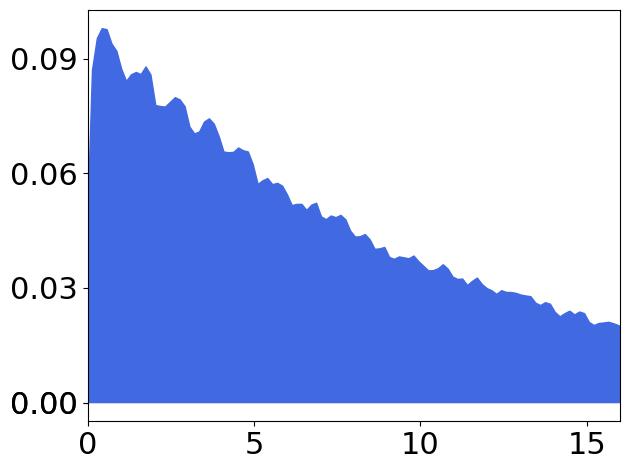

In [45]:
plt.fill_between(x_l.flatten(), pdf, color='royalblue', alpha=1)
plt.tick_params(axis='both', which='major', labelsize=22)

#plt.xlabel('Radius (meters)', size = 22 )
#plt.ylabel('Density', size = 22)
plt.xticks(np.arange(0, 30, 5))  # Set x ticks from 0 to 12 with a step of 1
custom_y_ticks = [ 0,0,0.03, 0.06, 0.09]  # Replace these values with the ones you think are best for your data
plt.yticks(custom_y_ticks)  # Set y ticks to your custom values

plt.xlim(0, 16)


# Adjust plot to ensure labels and titles are not cut off
plt.tight_layout()

# Save the plot as an SVG file with transparency
plt.savefig(r'C:\Users\ss6365\Desktop\location_privacy-main\location_privacy-main\figure\staircase_plot_2.svg', format='svg', transparent=True)

# Show the plot
plt.show()